/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


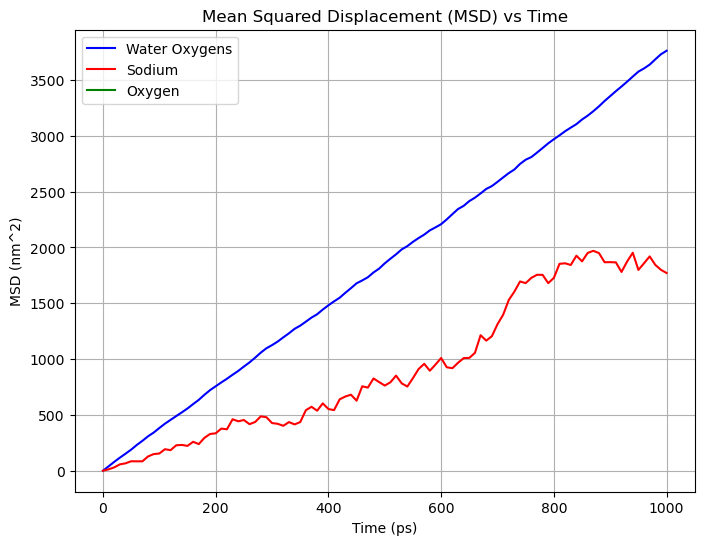

In [1]:
# Import necessary libraries
import MDAnalysis as mda
from MDAnalysis.analysis import msd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the trajectory and topology files
u = mda.Universe('step5_1.tpr', 'unwrapped.xtc')

# Step 2: Select the atom groups
water_oxygens = u.select_atoms("resname TIP3 and name OH2")
sodium_atoms = u.select_atoms("name SOD")
oxygen_atoms = u.select_atoms("name O")

# Function to calculate MSD for a given atom group
def calculate_msd(atom_group):
    n_frames = len(u.trajectory)
    n_atoms = len(atom_group)
    
    # Initialize an array to store MSD values
    msd_values = np.zeros(n_frames)
    
    # Reference positions for the first frame
    ref_positions = atom_group.positions.copy()
    
    for ts in u.trajectory:
        current_positions = atom_group.positions
        displacements = current_positions - ref_positions
        squared_displacements = np.sum(displacements**2, axis=1)
        msd_values[ts.frame] = np.mean(squared_displacements)
    
    return msd_values

# Step 3: Calculate MSD for each group
msd_water = calculate_msd(water_oxygens)
msd_sodium = calculate_msd(sodium_atoms)
msd_oxygen = calculate_msd(oxygen_atoms)

# Step 4: Plot MSD vs time for all three groups
time = np.arange(0, len(msd_water)) * u.trajectory.dt  # Time array

plt.figure(figsize=(8, 6))
plt.plot(time, msd_water, label='Water Oxygens', color='b')
plt.plot(time, msd_sodium, label='Sodium', color='r')
plt.plot(time, msd_oxygen, label='Oxygen', color='g')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (nm^2)')
plt.title('Mean Squared Displacement (MSD) vs Time')
plt.legend()
plt.grid(True)

# Save the figure in the Figures folder
# plt.savefig('Figures/msd_plot.png')

# Show the plot
plt.show()